**CODERS CAVE**

**GOLDEN TASK - Breast Cancer Prediction**

**Soumalya Bhattacharyya - Machine Learning Intern**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.graph_objects as go
import plotly.express as px

In [2]:
train = pd.read_csv('datafile.csv')
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
train.shape

(569, 33)

In [5]:
train.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


Finding Missing Values

In [6]:
missing_values=train.isnull().sum()
percent_missing = train.isnull().sum()/train.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
id,0,0.0
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0


In [7]:
# Only the unnamed column is empty so we will drop the column
train=train.drop('Unnamed: 32',axis=1)
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Feature Selection

In [8]:
# Drop the id column
train=train.drop('id',axis=1)
train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# transformation of type of the target value to numerical
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train.diagnosis = le.fit_transform(train.diagnosis)
train.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

Diagonsis
1. Malignant - 1
2. benign - 0

Coorelation Map

In [10]:
train.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-10-666c4ce31351>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  train.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,0.33,-0.01,0.57,-0.01,0.56,0.55,-0.07,0.29,0.25,0.41,-0.01,0.08,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_mean,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.10,0.67,0.74,-0.22,0.21,0.19,0.38,-0.10,-0.04,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,0.28,0.39,0.28,0.26,0.01,0.19,0.14,0.16,0.01,0.05,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.09,0.69,0.74,-0.20,0.25,0.23,0.41,-0.08,-0.01,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,0.73,-0.07,0.73,0.80,-0.17,0.21,0.21,0.37,-0.07,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,0.30,0.07,0.30,0.25,0.33,0.32,0.25,0.38,0.20,0.28,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,0.50,0.05,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,0.63,0.08,0.66,0.62,0.10,0.67,0.69,0.68,0.18,0.45,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,0.70,0.02,0.71,0.69,0.03,0.49,0.44,0.62,0.10,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.33,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,0.30,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44


this feautres had a corralation valus < 0.07 with the target columns

fractal_dimension_mean / texture_se / smoothness_se / symmetry_se / fractal_dimension_se

In [11]:
# drop this columns
train=train.drop(['fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se'],axis=1)

In [12]:
train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


[0.05233948 0.02311915 0.05588546 0.05476714 0.00915101 0.01376878
 0.06460334 0.08814609 0.00630262 0.02329876 0.01142807 0.03450096
 0.00645994 0.00822577 0.00803595 0.05926637 0.03246362 0.09085222
 0.08527621 0.01900405 0.03283638 0.04811107 0.14402367 0.01776298
 0.0103709 ]


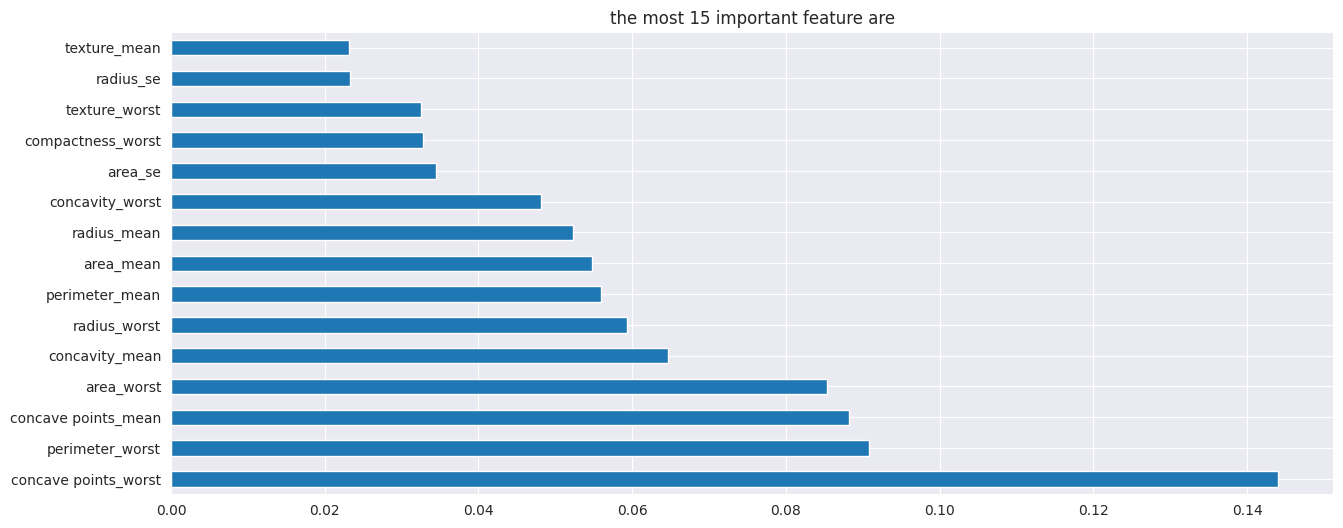

In [13]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")

x = train.drop('diagnosis',axis=1)
y = train.diagnosis

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('the most 15 important feature are')
plt.show()

In [14]:
train.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
train=train.drop(['texture_mean','smoothness_mean','compactness_mean','symmetry_mean','perimeter_se','compactness_se','concavity_se','concave points_se','smoothness_worst','symmetry_worst','fractal_dimension_worst'],axis=1)

In [16]:
train.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.3001,0.14710,1.0950,153.40,25.38,17.33,184.60,2019.0,0.6656,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.0869,0.07017,0.5435,74.08,24.99,23.41,158.80,1956.0,0.1866,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.1974,0.12790,0.7456,94.03,23.57,25.53,152.50,1709.0,0.4245,0.4504,0.2430
3,1,11.42,77.58,386.1,0.2414,0.10520,0.4956,27.23,14.91,26.50,98.87,567.7,0.8663,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.1980,0.10430,0.7572,94.44,22.54,16.67,152.20,1575.0,0.2050,0.4000,0.1625


Data Visualization

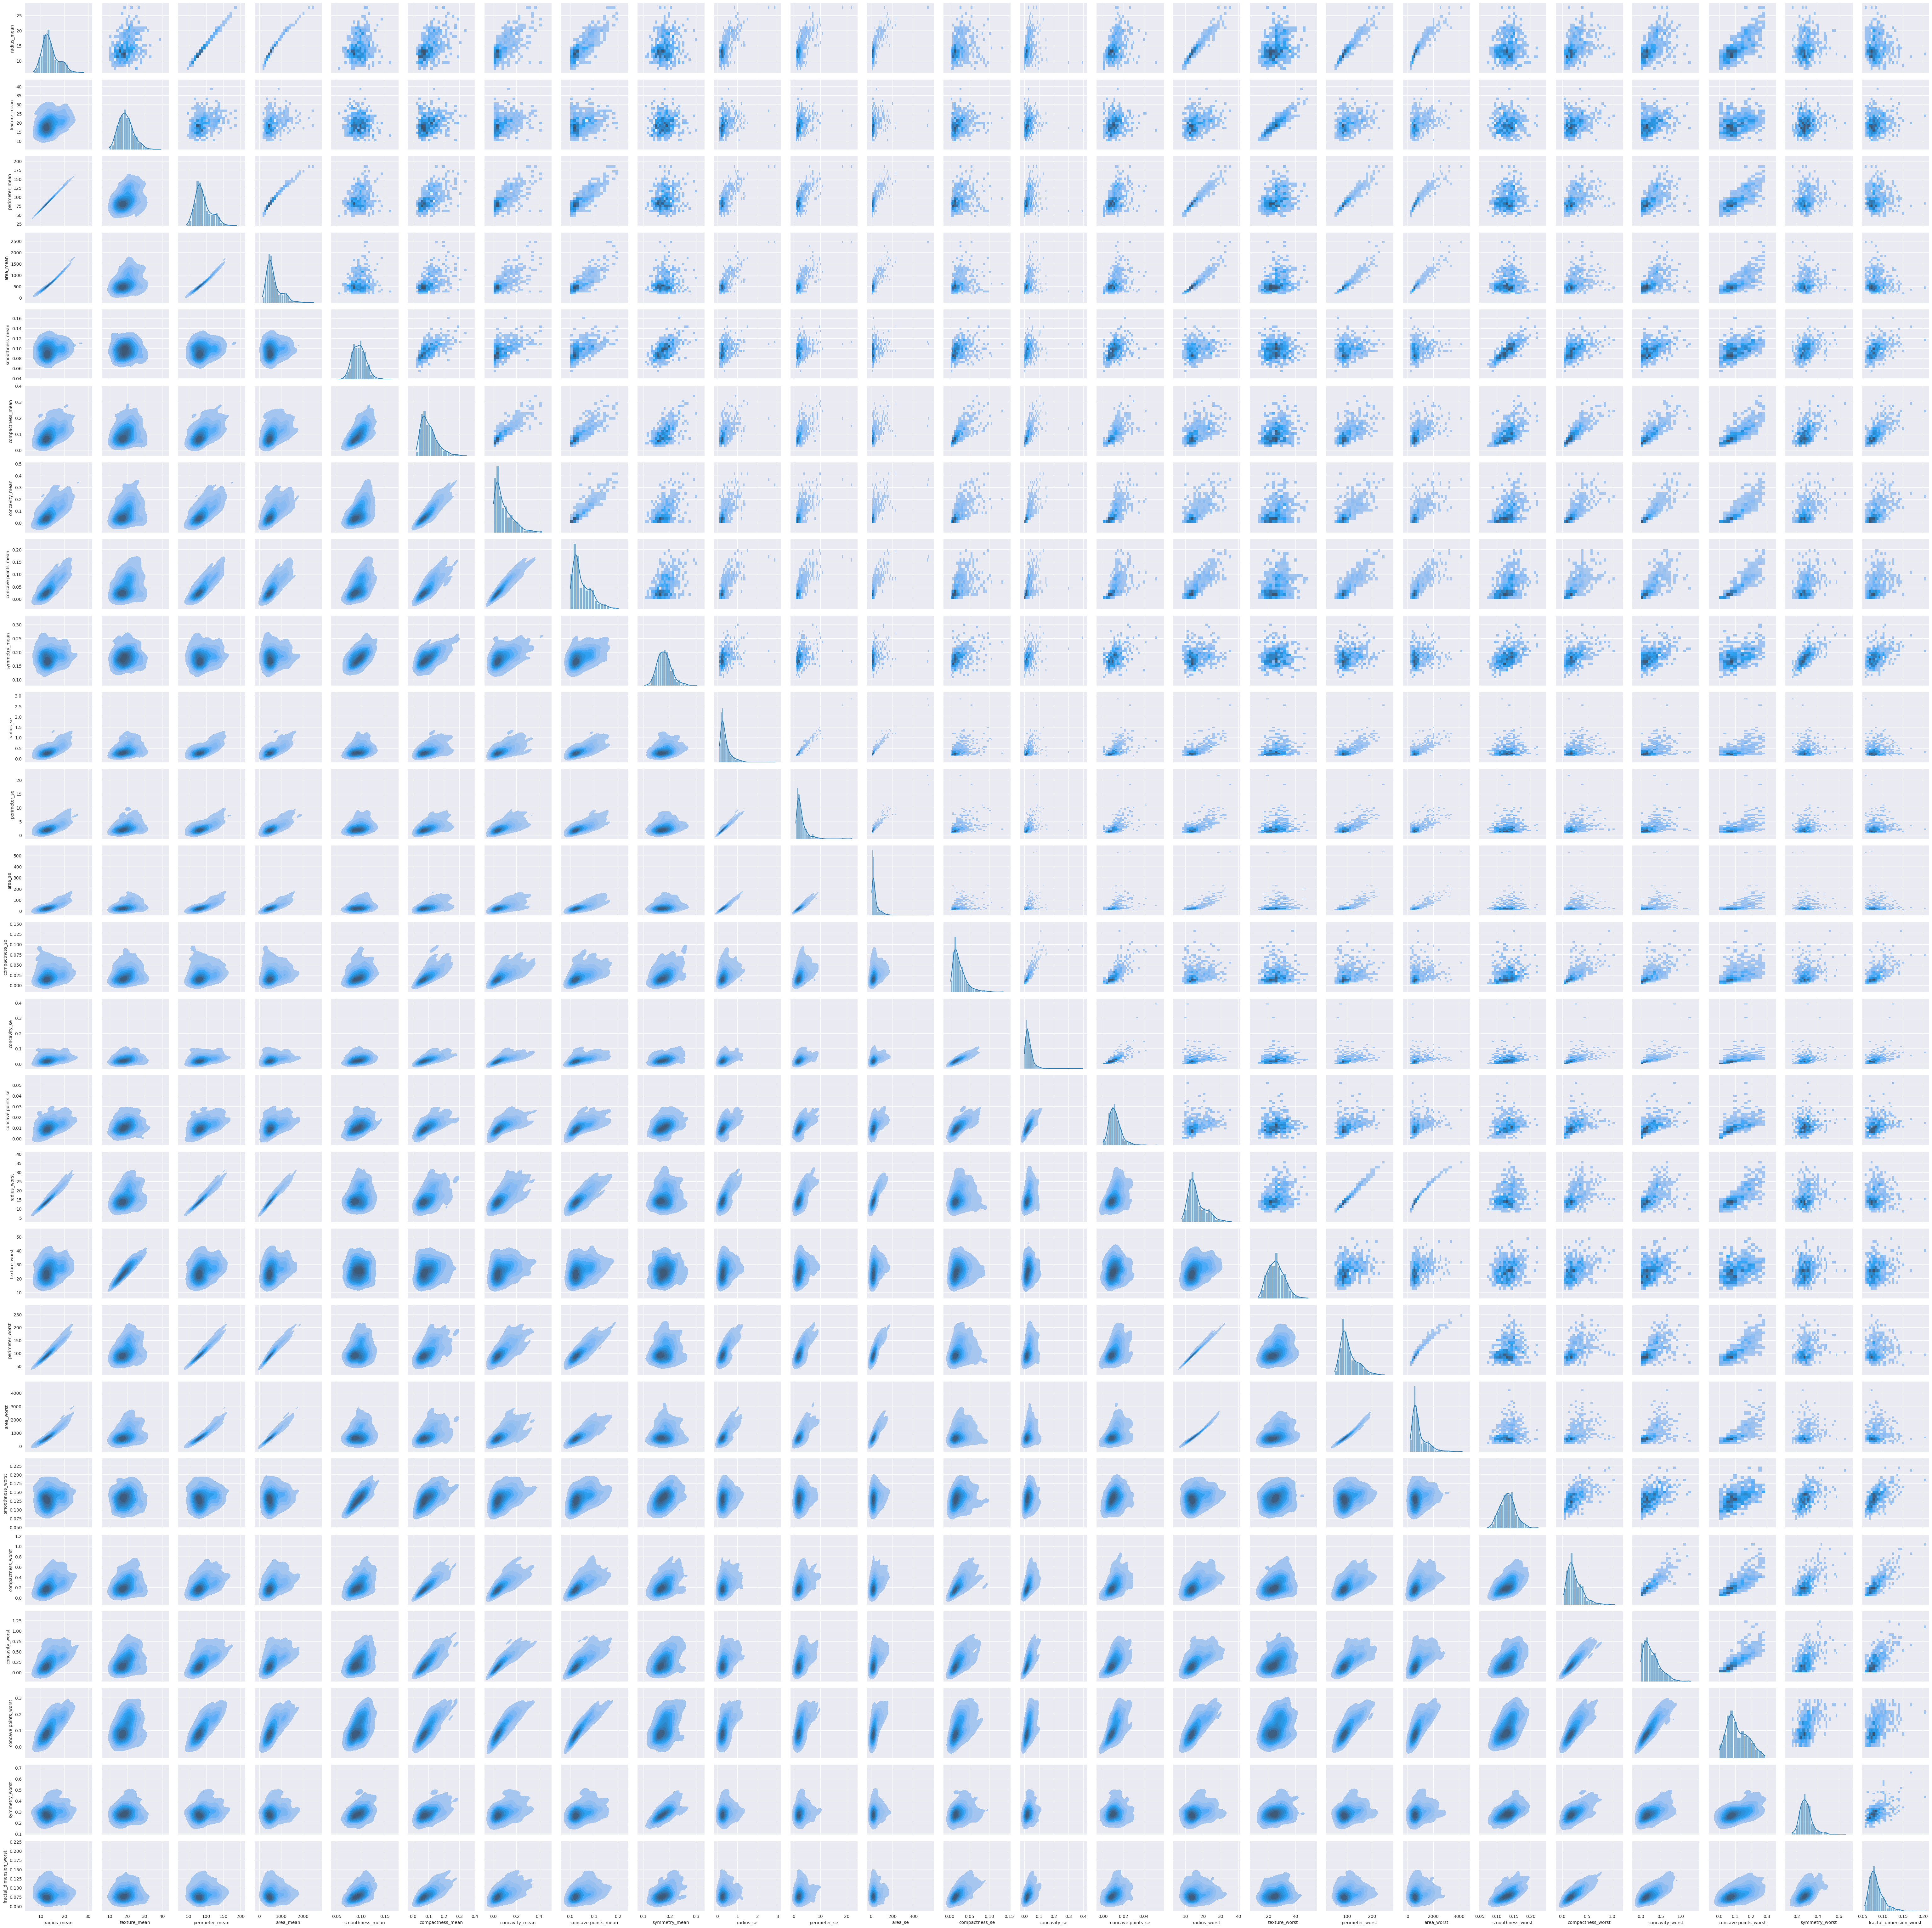

In [17]:
# Plotting Many Distribution
g = sns.PairGrid(x)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

Text(0.5, 1.0, 'Number of diagnosis ')

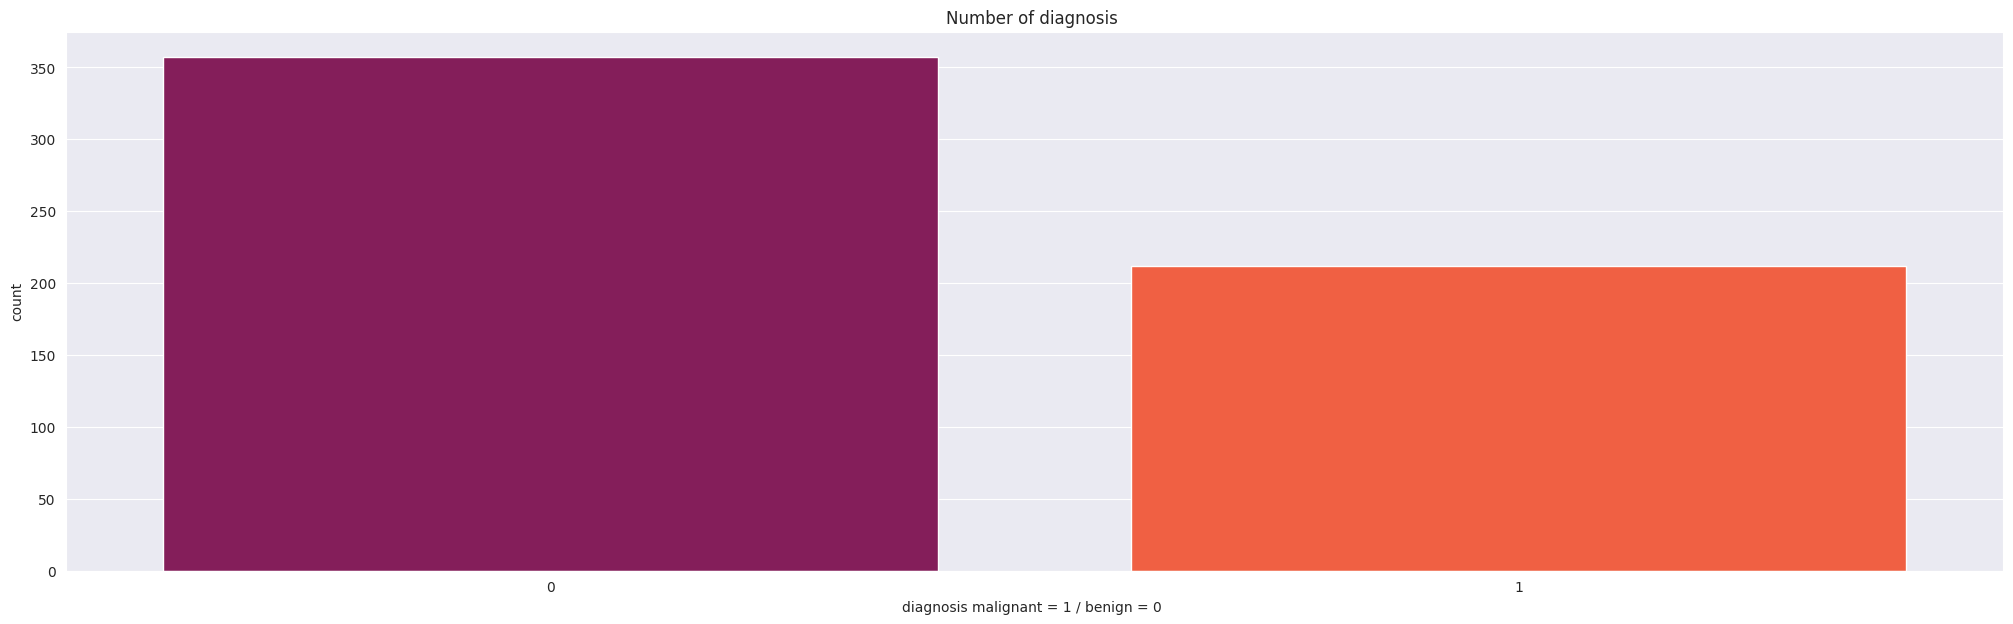

In [18]:
# Diagnosis

plt.rcParams['figure.figsize']=25,7
sns.set_style("darkgrid")
ax = sns.countplot(x=train.diagnosis , palette = "rocket", saturation =1.5)
plt.xlabel("diagnosis malignant = 1 / benign = 0 ", fontsize = 10 )
plt.ylabel("count", fontsize = 10)
plt.title('Number of diagnosis ')

<Axes: xlabel='concave points_worst'>

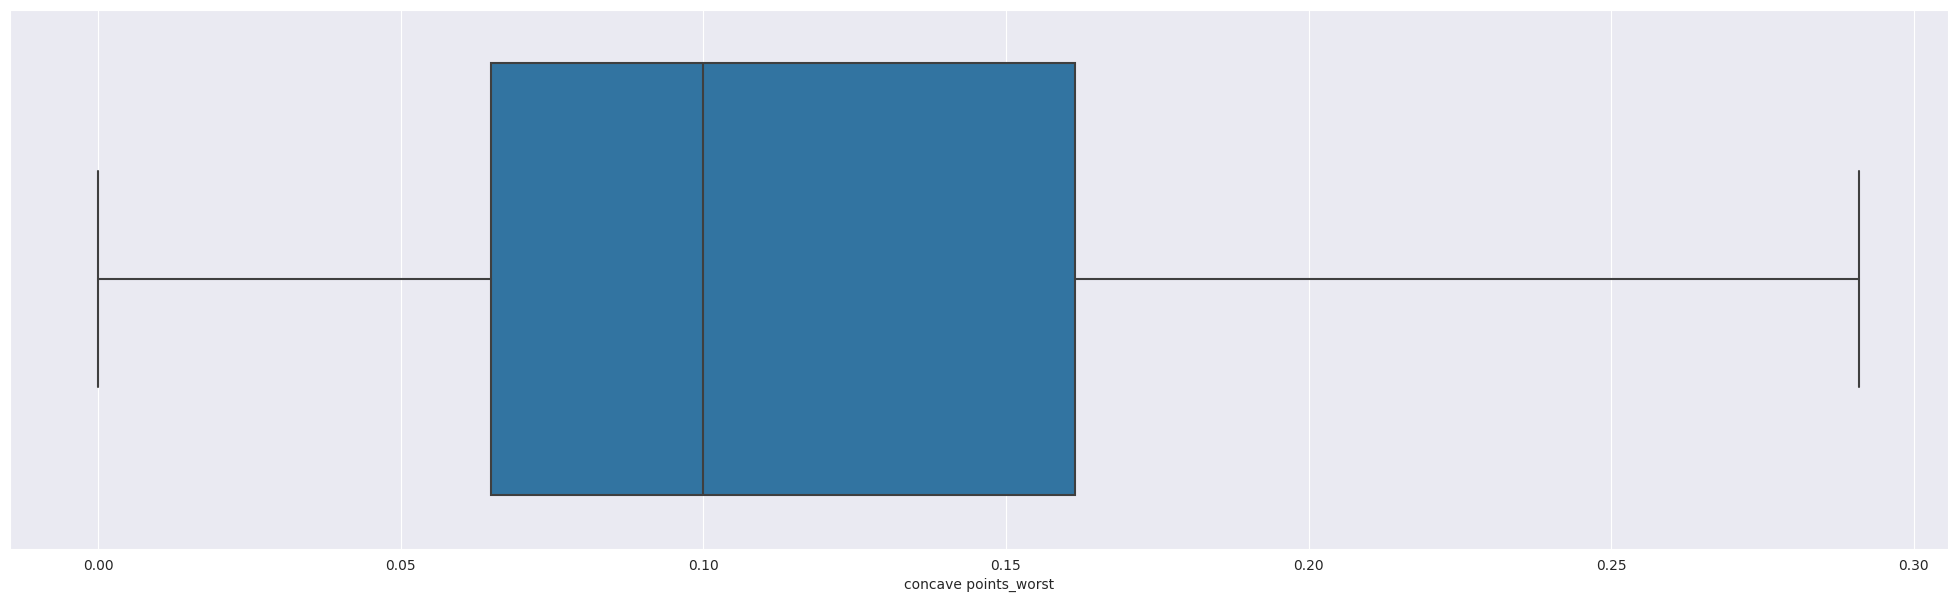

In [19]:
# Concave points_worst
sns.boxplot(x=train['concave points_worst'])

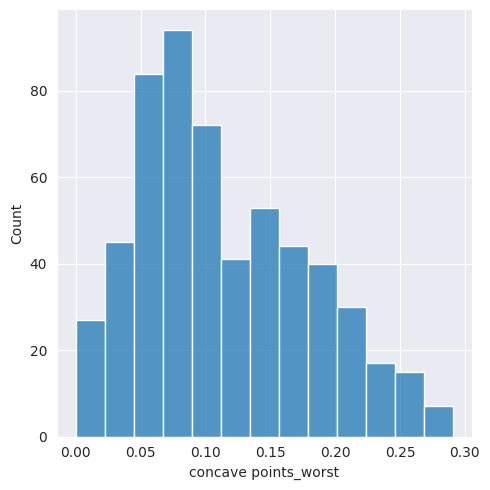

In [20]:
sns.displot(train, x='concave points_worst')

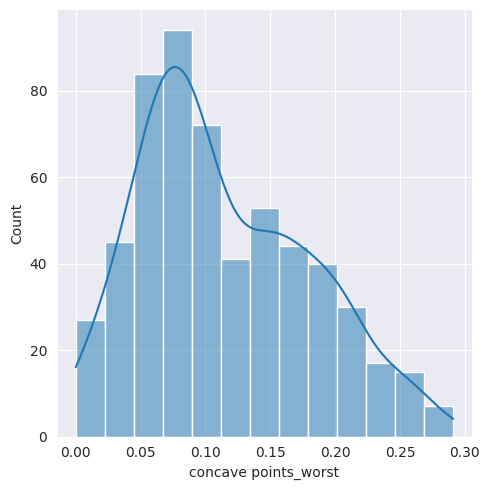

In [21]:
sns.displot(train, x="concave points_worst", kde=True)

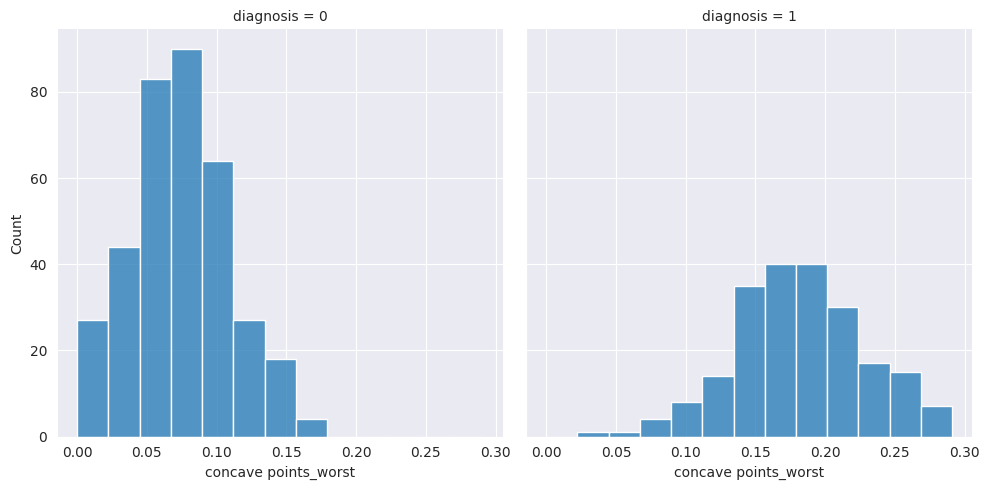

In [22]:
sns.displot(train, x="concave points_worst", col="diagnosis", multiple="dodge")

<Axes: xlabel='concavity_mean'>

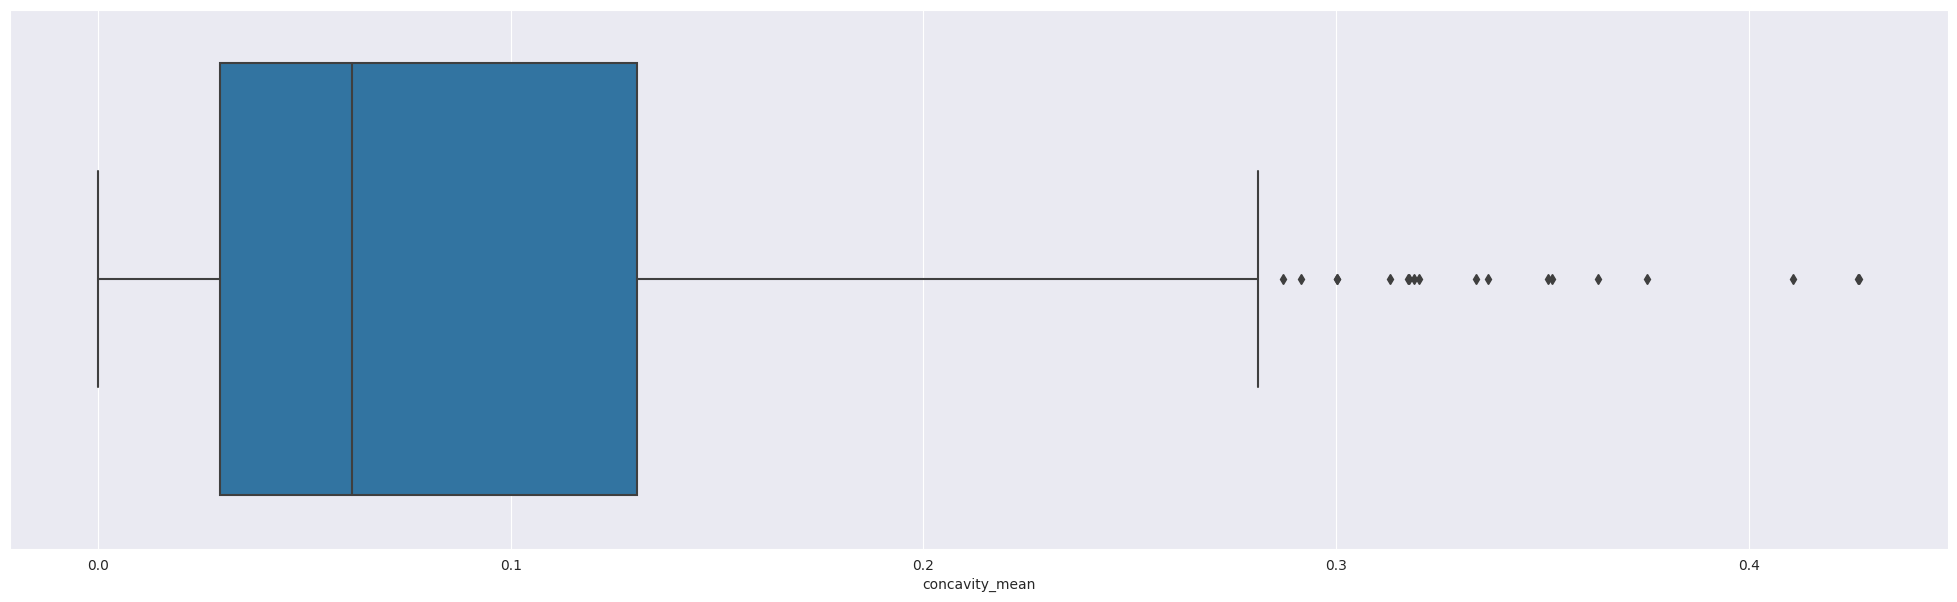

In [23]:
# concavity_mean
sns.boxplot(x=train['concavity_mean'])

In [24]:
# there are some outlier remove them (0.3-0.5)
outlier=train[train['concavity_mean']>=0.25]
outlier

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.990,122.80,1001.0,0.3001,0.14710,1.0950,153.40,25.38,17.33,184.60,2019.0,0.6656,0.7119,0.2654
68,0,9.029,58.79,250.5,0.3130,0.04375,0.3274,17.67,10.31,22.65,65.50,324.7,0.4365,1.2520,0.1750
78,1,20.180,143.70,1245.0,0.3754,0.16040,0.9317,116.40,23.37,31.72,170.30,1623.0,0.6164,0.7681,0.2508
82,1,25.220,171.50,1878.0,0.3339,0.18450,0.8973,120.00,30.00,33.62,211.70,2562.0,0.6076,0.6476,0.2867
108,1,22.270,152.80,1509.0,0.4264,0.18230,1.2150,170.00,28.40,28.01,206.80,2360.0,0.6997,0.9608,0.2910
112,0,14.260,97.83,629.9,0.3003,0.07798,0.3628,29.25,15.30,23.73,107.00,709.0,0.4193,0.6783,0.1505
122,1,24.250,166.20,1761.0,0.4268,0.20120,1.5090,233.00,26.02,23.99,180.90,2073.0,0.4244,0.5803,0.2248
129,1,19.790,130.40,1192.0,0.2545,0.11490,0.4953,63.33,22.63,33.58,148.70,1589.0,0.3861,0.5673,0.1732
152,0,9.731,63.78,300.2,0.4108,0.07857,0.8245,49.85,11.02,19.49,71.04,380.5,0.2772,0.8216,0.1571
162,1,19.590,130.70,1214.0,0.2508,0.12860,0.7364,97.07,26.73,26.39,174.90,2232.0,0.3846,0.6810,0.2247


In [25]:
train = train[train['concavity_mean']<0.25]
train

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
1,1,20.57,132.90,1326.0,0.08690,0.07017,0.5435,74.08,24.990,23.41,158.80,1956.0,0.18660,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.19740,0.12790,0.7456,94.03,23.570,25.53,152.50,1709.0,0.42450,0.4504,0.2430
3,1,11.42,77.58,386.1,0.24140,0.10520,0.4956,27.23,14.910,26.50,98.87,567.7,0.86630,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.19800,0.10430,0.7572,94.44,22.540,16.67,152.20,1575.0,0.20500,0.4000,0.1625
5,1,12.45,82.57,477.1,0.15780,0.08089,0.3345,27.19,15.470,23.75,103.40,741.6,0.52490,0.5355,0.1741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,0,11.20,70.67,386.0,0.00000,0.00000,0.3141,22.81,11.920,38.30,75.19,439.6,0.05494,0.0000,0.0000
564,1,21.56,142.00,1479.0,0.24390,0.13890,1.1760,158.70,25.450,26.40,166.10,2027.0,0.21130,0.4107,0.2216
565,1,20.13,131.20,1261.0,0.14400,0.09791,0.7655,99.04,23.690,38.25,155.00,1731.0,0.19220,0.3215,0.1628
566,1,16.60,108.30,858.1,0.09251,0.05302,0.4564,48.55,18.980,34.12,126.70,1124.0,0.30940,0.3403,0.1418


<Axes: xlabel='concavity_mean'>

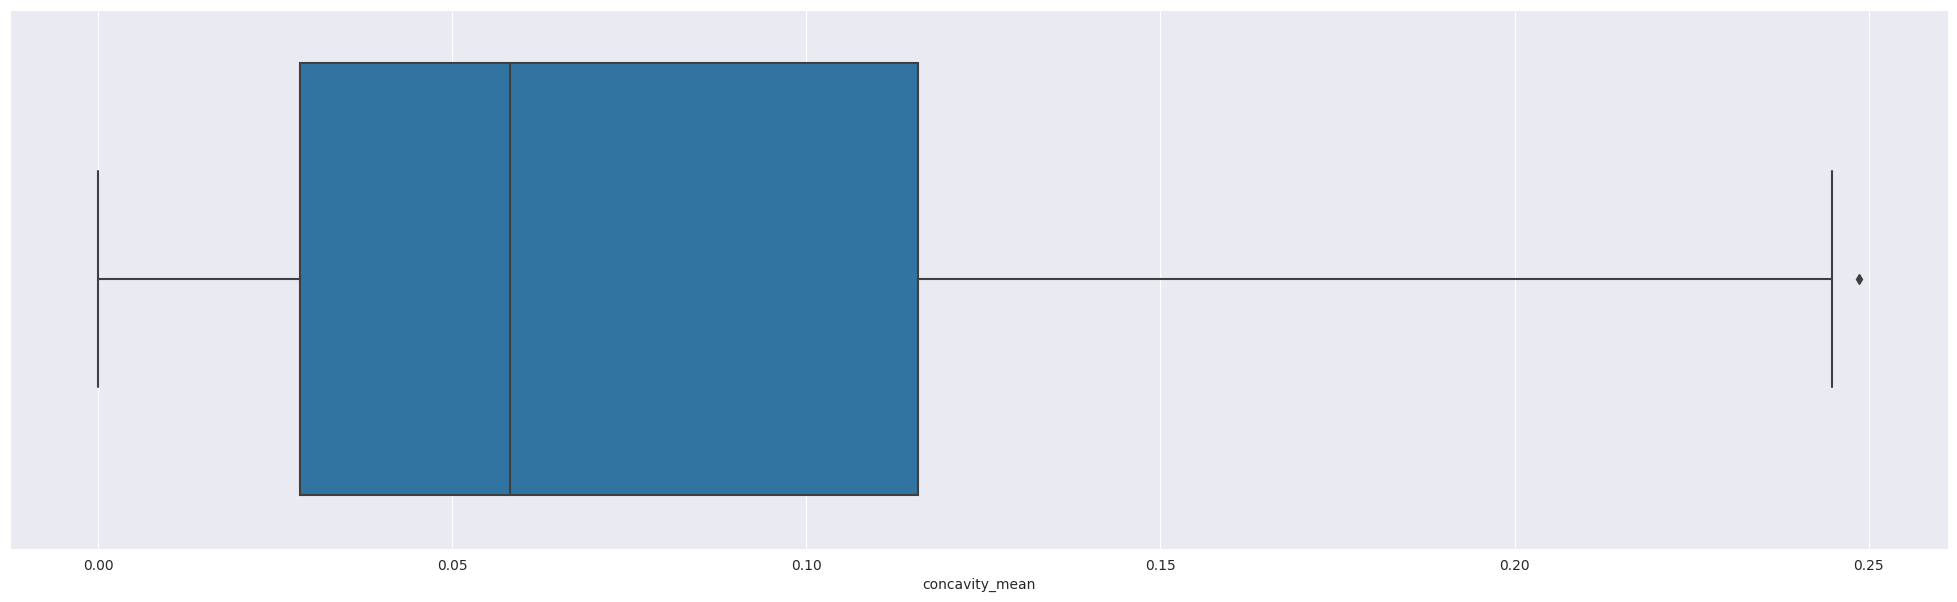

In [26]:
sns.boxplot(x=train['concavity_mean'])

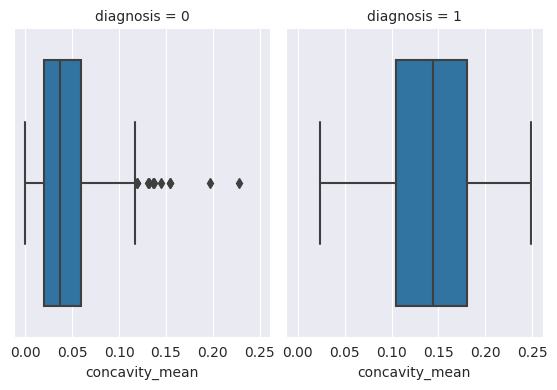

In [27]:
sns.catplot(x="concavity_mean",
                col="diagnosis",
                data=train, kind="box",
                height=4, aspect=.7);

<Axes: xlabel='perimeter_worst'>

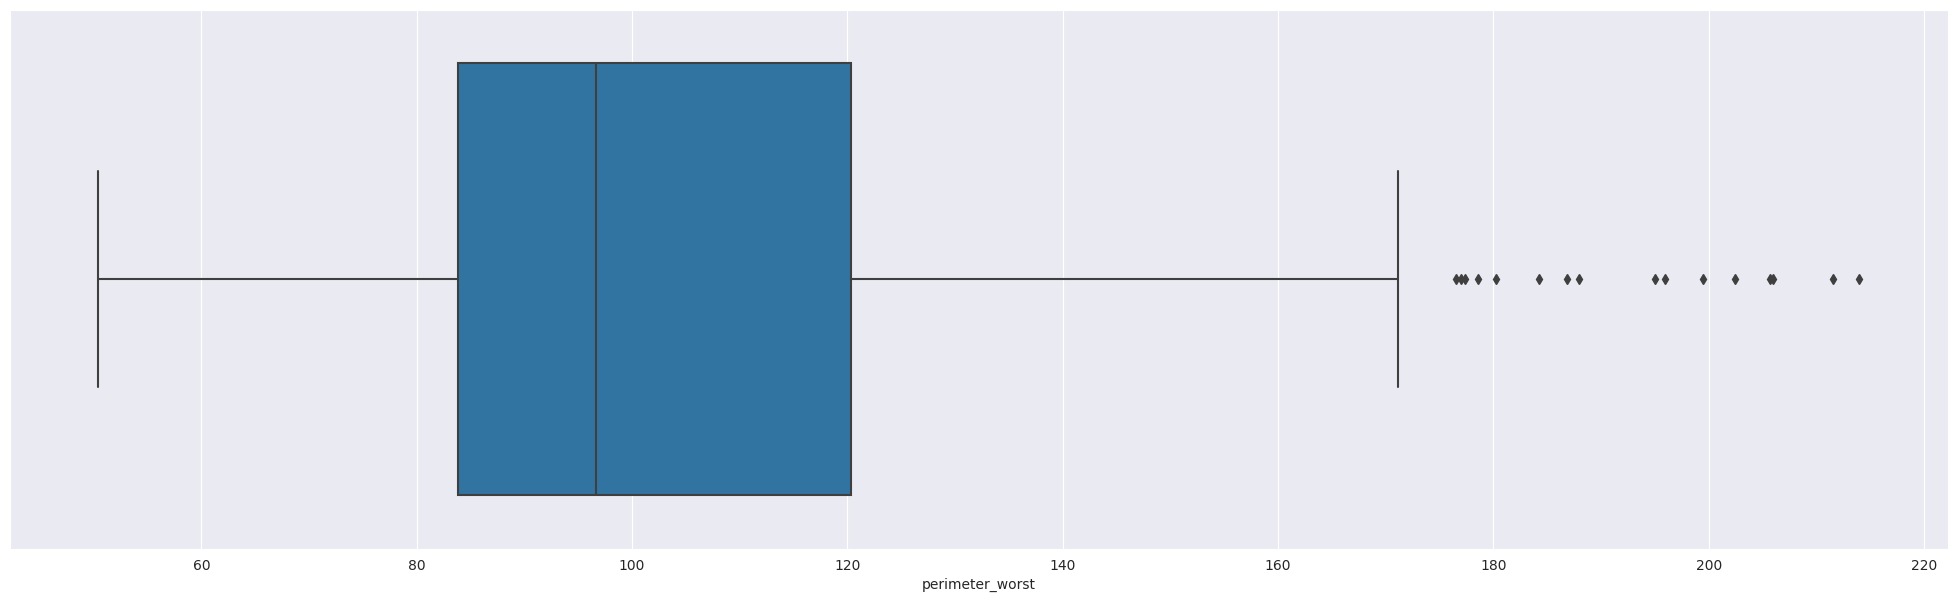

In [28]:
# perimeter_worst
sns.boxplot(x=train['perimeter_worst'])

In [29]:
# there are outliers(>120) removing them
outlier=train[train['perimeter_worst']>=165]
outlier

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
18,1,19.81,130.0,1260.0,0.1479,0.09498,0.7582,112.40,27.32,30.88,186.8,2398.0,0.3150,0.5372,0.2388
23,1,21.16,137.2,1404.0,0.1097,0.08632,0.6917,93.99,29.17,35.59,188.0,2615.0,0.2600,0.3155,0.2009
24,1,16.65,110.0,904.6,0.1525,0.09170,0.8068,102.60,26.46,31.56,177.0,2215.0,0.3578,0.4695,0.2095
42,1,19.07,128.3,1104.0,0.2107,0.09961,0.9811,104.90,24.09,33.17,177.4,1651.0,0.7444,0.7242,0.2493
56,1,19.21,125.5,1152.0,0.1323,0.08994,0.7275,102.50,26.14,28.14,170.1,2145.0,0.3511,0.3879,0.2091
70,1,18.94,123.6,1130.0,0.1080,0.07951,0.7888,96.05,24.86,26.58,165.9,1866.0,0.2336,0.2687,0.1789
164,1,23.27,152.1,1686.0,0.1324,0.09702,0.6642,97.85,28.01,28.22,184.2,2403.0,0.3583,0.3948,0.2346
181,1,21.09,142.7,1311.0,0.2487,0.14960,0.6298,81.46,26.68,33.48,176.5,2089.0,0.7584,0.6780,0.2903
198,1,19.18,127.5,1148.0,0.1114,0.06772,0.4357,54.22,23.36,32.06,166.4,1688.0,0.5601,0.3865,0.1708
218,1,19.80,129.7,1230.0,0.1272,0.08691,0.9553,124.40,25.73,28.64,170.3,2009.0,0.3235,0.3617,0.1820


In [30]:
train = train[train['perimeter_worst']<165]
train

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
1,1,20.57,132.90,1326.0,0.08690,0.07017,0.5435,74.08,24.990,23.41,158.80,1956.0,0.18660,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.19740,0.12790,0.7456,94.03,23.570,25.53,152.50,1709.0,0.42450,0.4504,0.2430
3,1,11.42,77.58,386.1,0.24140,0.10520,0.4956,27.23,14.910,26.50,98.87,567.7,0.86630,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.19800,0.10430,0.7572,94.44,22.540,16.67,152.20,1575.0,0.20500,0.4000,0.1625
5,1,12.45,82.57,477.1,0.15780,0.08089,0.3345,27.19,15.470,23.75,103.40,741.6,0.52490,0.5355,0.1741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,0,14.05,91.38,600.4,0.04462,0.04304,0.3645,29.84,15.300,33.17,100.20,706.7,0.22640,0.1326,0.1048
561,0,11.20,70.67,386.0,0.00000,0.00000,0.3141,22.81,11.920,38.30,75.19,439.6,0.05494,0.0000,0.0000
565,1,20.13,131.20,1261.0,0.14400,0.09791,0.7655,99.04,23.690,38.25,155.00,1731.0,0.19220,0.3215,0.1628
566,1,16.60,108.30,858.1,0.09251,0.05302,0.4564,48.55,18.980,34.12,126.70,1124.0,0.30940,0.3403,0.1418


<Axes: xlabel='perimeter_worst'>

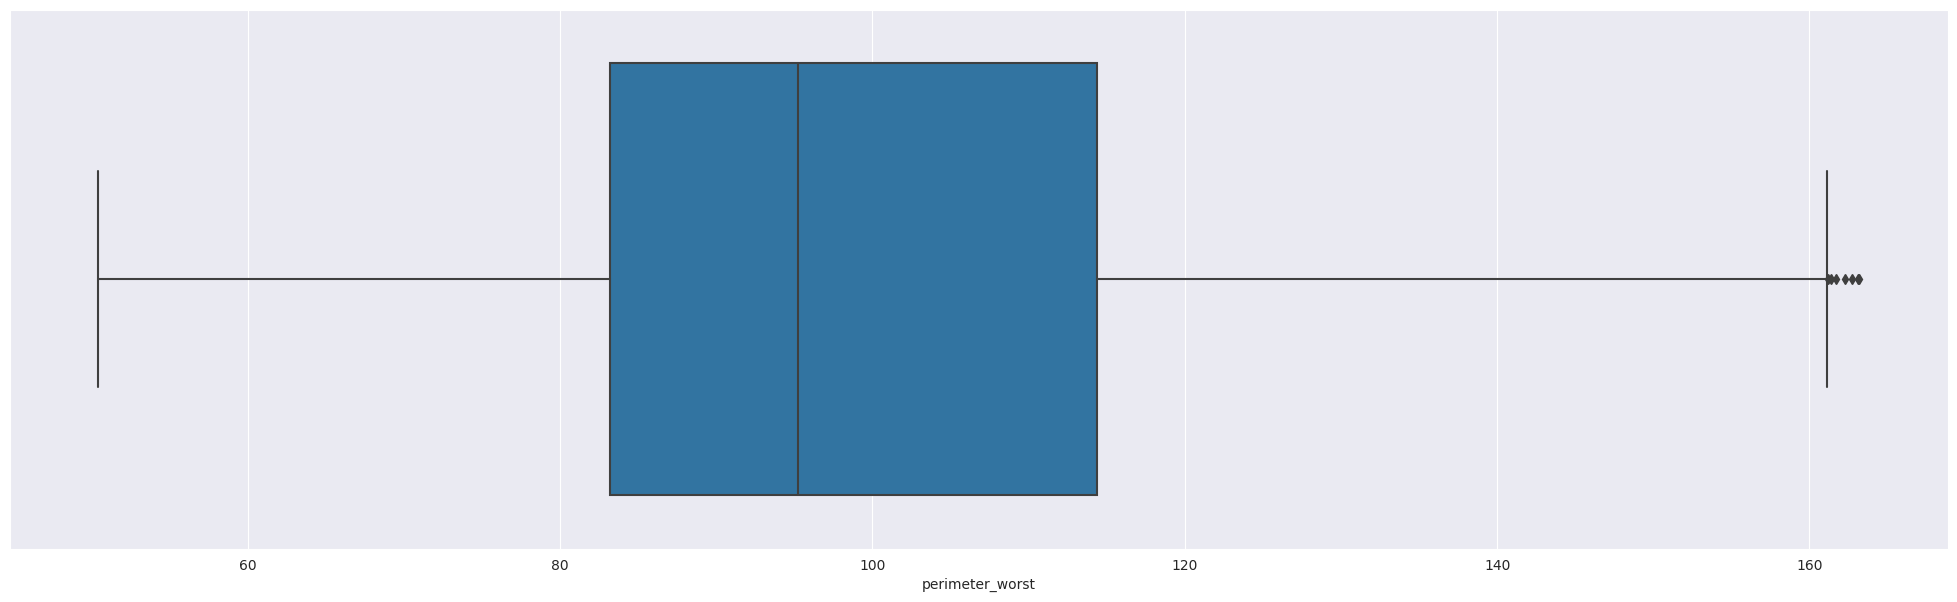

In [31]:
sns.boxplot(x=train['perimeter_worst'])

MACHINE LEARNING

Split Data into 70train, 30test

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [33]:
x=train.drop('diagnosis',axis=1)
y=train.diagnosis

In [34]:
print(x.shape)
print(y.shape)

(520, 14)
(520,)


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

LOGISTIC REGRESSION

In [37]:
# Making Confusion Matrix and calculating accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)

mylist.append(acc_logreg)
print(cm)
print(acc_logreg,'%')

[[104   2]
 [  4  46]]
0.9615384615384616 %


K NEAREST NEIGHBOUR (KNN)

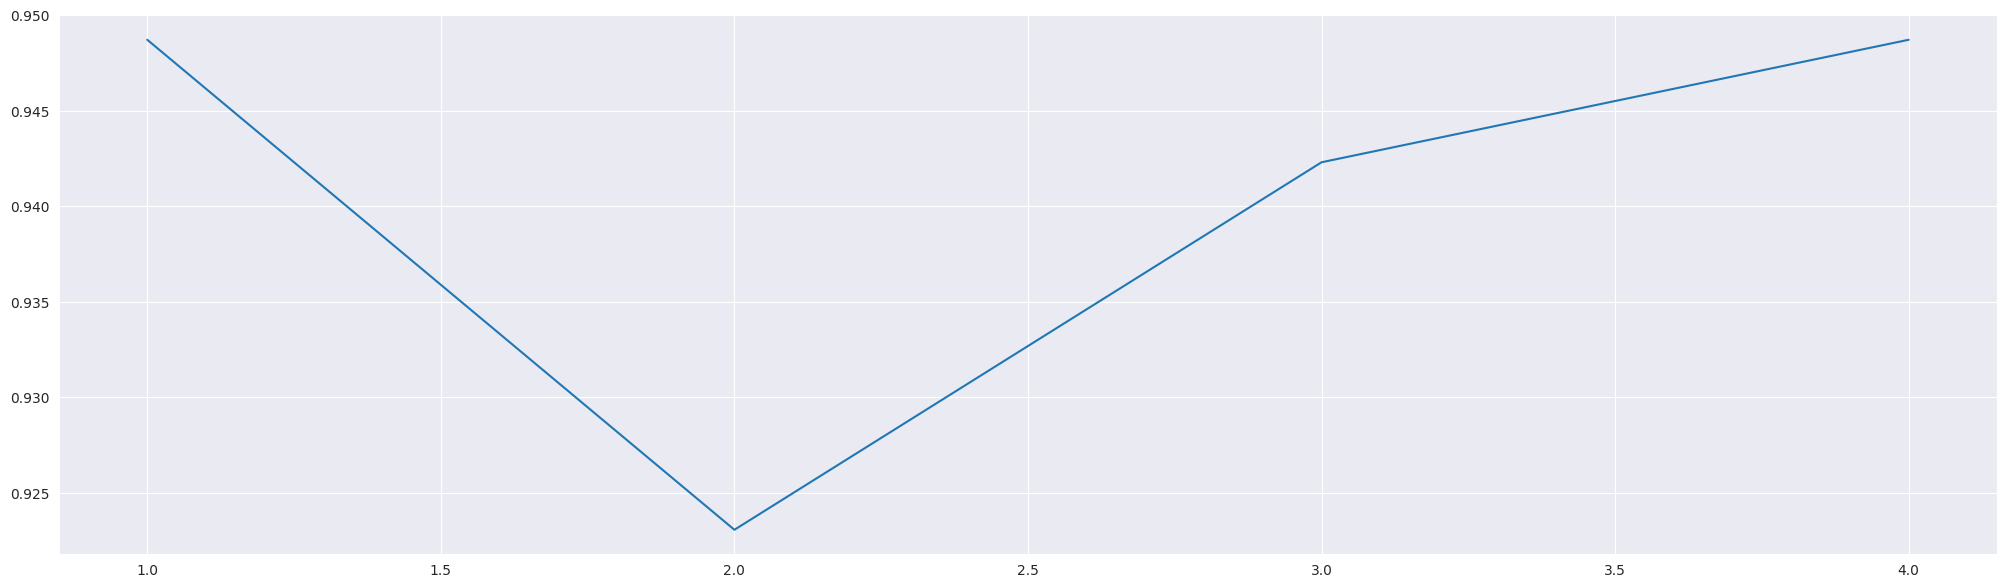

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(1,5):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(1,5)), list1)
plt.show()

In [39]:
# Training the K Nearest Neighbor Classifier on the Training set

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

# Predicting the Test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0]


In [40]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_knn = accuracy_score(y_test, y_pred)
mylist.append(acc_knn)
print(cm)
print(acc_knn)

[[102   4]
 [  5  45]]
0.9423076923076923


SUPPORT VECTOR MACHINE

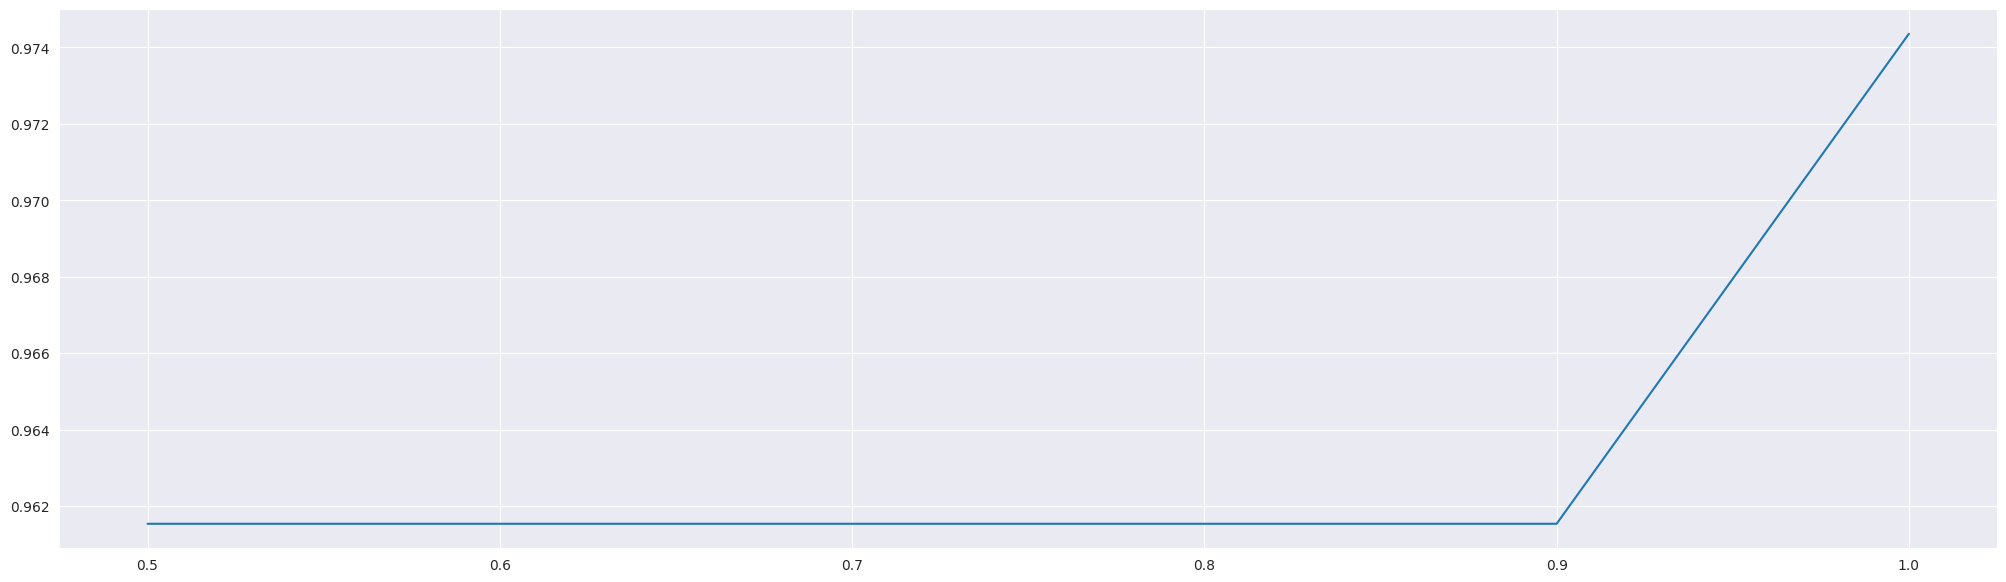

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()

In [42]:
# Training the Support Vector Classifier on the Training set

from sklearn.svm import SVC
classifier = SVC(C = 0.9, random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)

SVC(C=0.9, random_state=0)

In [43]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0]


In [44]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_svc = accuracy_score(y_test, y_pred)
print(cm)
print(acc_svc,'%')
mylist.append(acc_svc)

[[104   2]
 [  4  46]]
0.9615384615384616 %


DECISION TREE CLASSIFIER

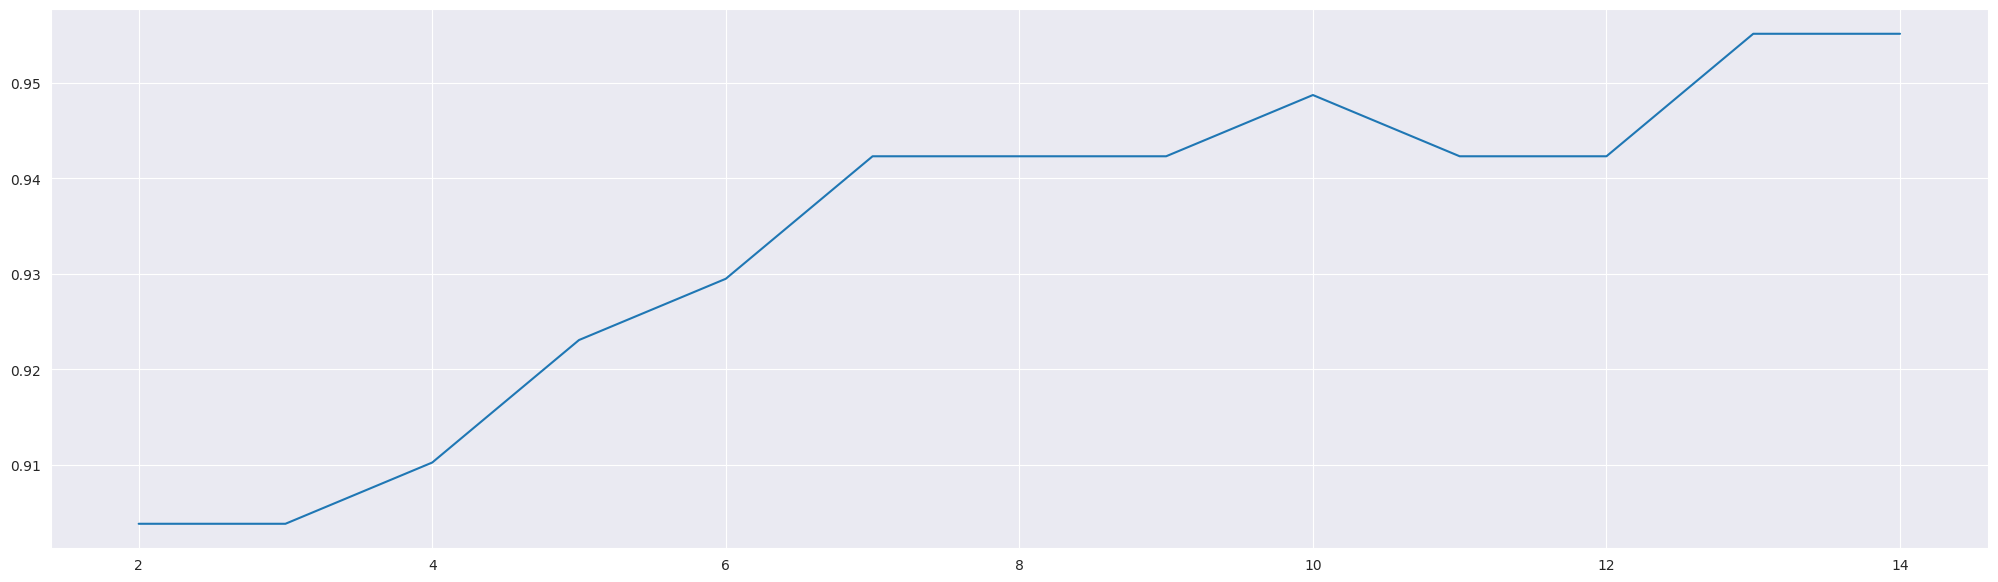

In [46]:
# Finding the optimum number of max_leaf_nodes

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,15):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(2,15)), list1)
plt.show()

In [47]:
# Training the Decision Tree Classifier on the Training set

classifier = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=0)

In [48]:
#Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0]


In [49]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_decisiontree = accuracy_score(y_test, y_pred)
print(cm)
print(acc_decisiontree)
mylist.append(acc_decisiontree)

[[101   5]
 [  7  43]]
0.9230769230769231


RANDOM FOREST CLASSIFICATION

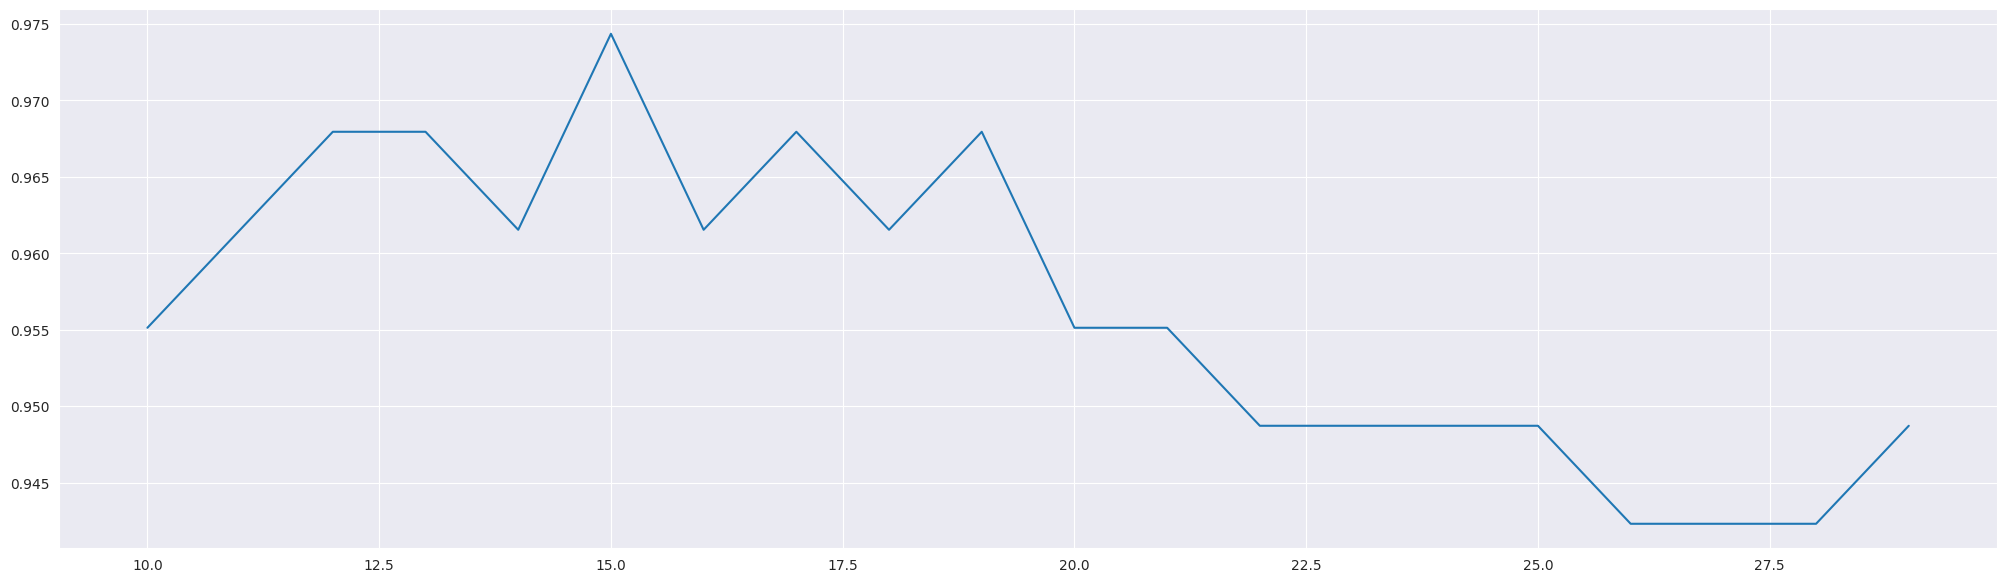

In [50]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(10,30)), list1)
plt.show()

In [51]:
# Training the RandomForest Classifier on the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [52]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0]


In [53]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_randomforest = accuracy_score(y_test, y_pred)
mylist.append(acc_randomforest)
print(cm)
print(acc_randomforest)

[[105   1]
 [  3  47]]
0.9743589743589743


ARTIFICIAL NEURAL NETWORK (ANN)

In [54]:
np.random.seed(0)
import tensorflow as tf

# Initialising the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

# Adding the third hidden layer
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

# Adding the fourth hidden layer
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

# Training the ANN on the training set
ann.fit(x_train, y_train, batch_size = 16, epochs = 100)

Epoch 1/100
23/23 [==============================] - 7s 5ms/step - loss: 0.6906 - accuracy: 0.5687
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6744 - accuracy: 0.9121
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.9396
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6184 - accuracy: 0.9396
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5744 - accuracy: 0.9368
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5110 - accuracy: 0.9341
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.3989 - accuracy: 0.9341
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 0.2703 - accuracy: 0.9368
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1901 - accuracy: 0.9478
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1515 - accuracy: 0.9560
Epoch 11/

In [55]:
# Predicting the test set results

y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.9)
np.set_printoptions()

5/5 [==============================] - 0s 2ms/step


In [56]:
# Making the confusion matrix, calculating accuracy_score

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()

# accuracy
ac_ann = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac_ann)
mylist.append(ac_ann)

Confusion Matrix
[[106   0]
 [ 11  39]]

Accuracy
0.9294871794871795


XGBOOST

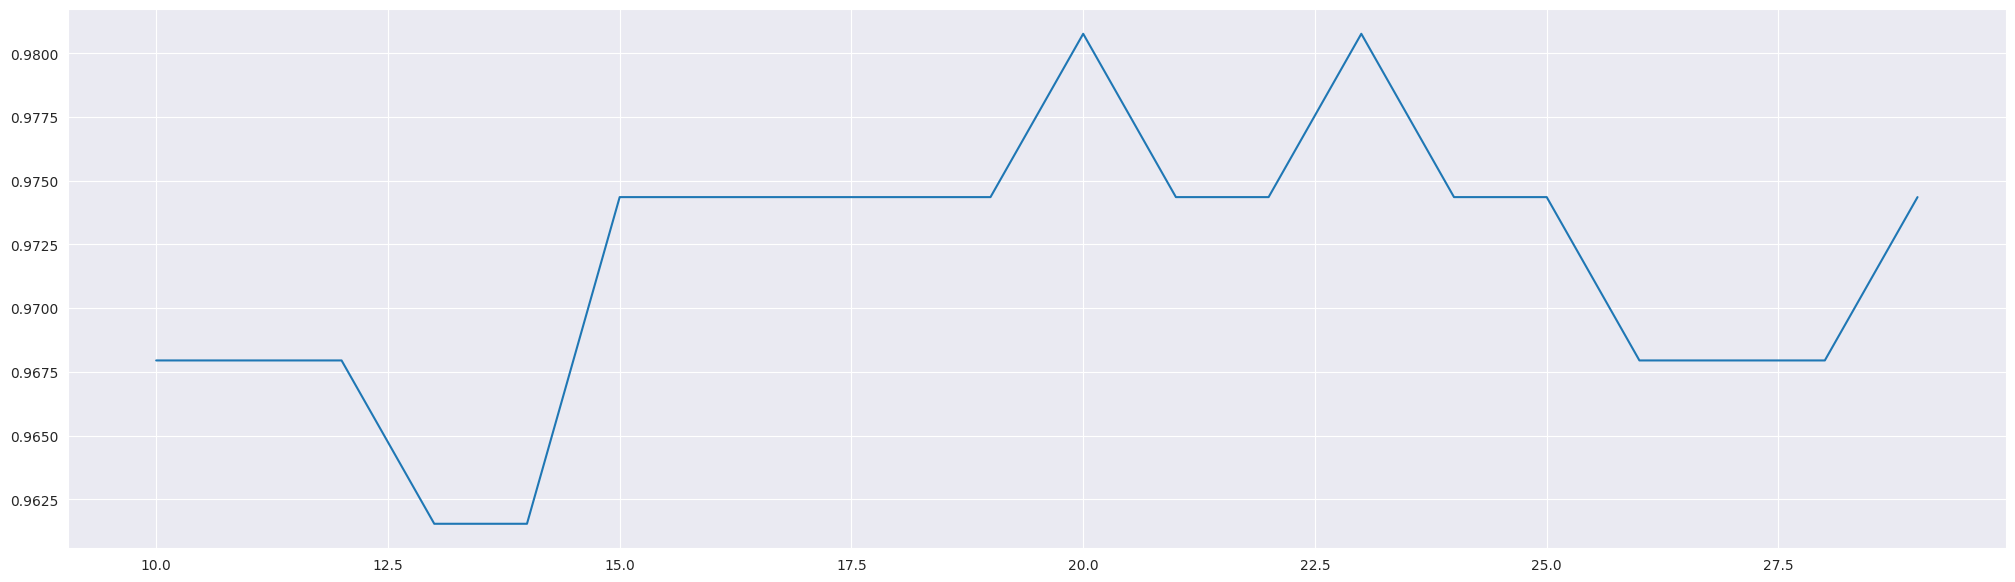

In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(10,30,1)), list1)
plt.show()

In [58]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 15, max_depth=12, subsample=0.7)
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=15, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [59]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0]


In [60]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac_xgboost = accuracy_score(y_test, y_pred)
mylist.append(ac_xgboost)
print(cm)
print(ac_xgboost)

[[105   1]
 [  3  47]]
0.9743589743589743


COMPARING THE DIFFERENT MODELS

In [62]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'ANN',
              'Decision Tree','xgboost'],
    'Score': [acc_svc, acc_knn, acc_logreg,
              acc_randomforest, ac_ann, acc_decisiontree,ac_xgboost
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.974359
6,xgboost,0.974359
0,Support Vector Machines,0.961538
2,Logistic Regression,0.961538
1,KNN,0.942308
4,ANN,0.929487
5,Decision Tree,0.923077


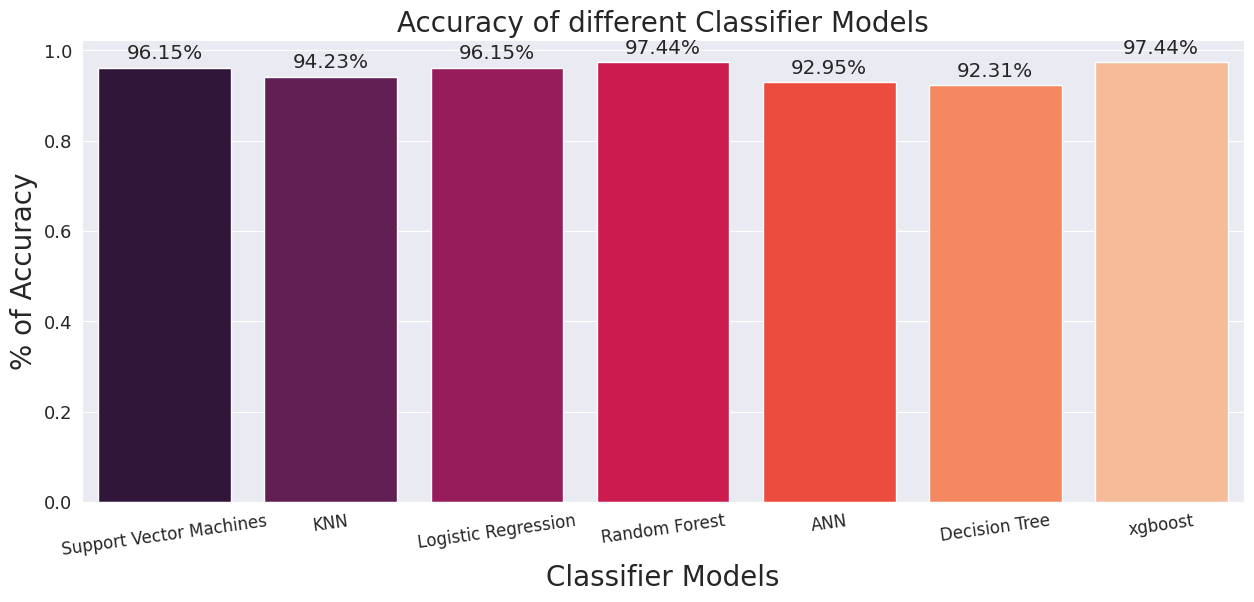

In [63]:
# Plotting the Comparision

plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()